In [38]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.stats import pearsonr
from sklearn.metrics.pairwise import linear_kernel
from sklearn.metrics.pairwise import rbf_kernel
from sklearn.metrics.pairwise import laplacian_kernel
from scipy.sparse import csr_matrix
import json

In [39]:
#Reading the Dataset
credits = pd.read_csv("C:\\Users\\ikapo\\OneDrive\\Desktop\\Recommendation System\\credits.csv")
movies = pd.read_csv("C:\\Users\\ikapo\\OneDrive\\Desktop\\Recommendation System\\tmdb_5000_movies.csv")
ratings = pd.read_csv("C:\\Users\\ikapo\\OneDrive\\Desktop\\Recommendation System\\ratings.csv")

### Exploratory Data Analysis

In [40]:
credits

,cast,crew,id
0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",862
1,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...",8844
2,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de...",15602
3,"[{'cast_id': 1, 'character': ""Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de...",31357
4,"[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de...",11862
...,...,...,...
45471,"[{'cast_id': 0, 'character': '', 'credit_id': ...","[{'credit_id': '5894a97d925141426c00818c', 'de...",439050
45472,"[{'cast_id': 1002, 'character': 'Sister Angela...","[{'credit_id': '52fe4af1c3a36847f81e9b15', 'de...",111109
45473,"[{'cast_id': 6, 'character': 'Emily Shaw', 'cr...","[{'credit_id': '52fe4776c3a368484e0c8387', 'de...",67758
45474,"[{'cast_id': 2, 'character': '', 'credit_id': ...","[{'credit_id': '533bccebc3a36844cf0011a7', 'de...",227506


In [41]:
movies

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4798,220000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",NaN,9367,"[{""id"": 5616, ""name"": ""united states\u2013mexi...",es,El Mariachi,El Mariachi just wants to play his guitar and ...,14.269792,"[{""name"": ""Columbia Pictures"", ""id"": 5}]","[{""iso_3166_1"": ""MX"", ""name"": ""Mexico""}, {""iso...",1992-09-04,2040920,81.0,"[{""iso_639_1"": ""es"", ""name"": ""Espa\u00f1ol""}]",Released,"He didn't come looking for trouble, but troubl...",El Mariachi,6.6,238
4799,9000,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 10749, ""...",NaN,72766,[],en,Newlyweds,A newlywed couple's honeymoon is upended by th...,0.642552,[],[],2011-12-26,0,85.0,[],Released,A newlywed couple's honeymoon is upended by th...,Newlyweds,5.9,5
4800,0,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...",http://www.hallmarkchannel.com/signedsealeddel...,231617,"[{""id"": 248, ""name"": ""date""}, {""id"": 699, ""nam...",en,"Signed, Sealed, Delivered","""Signed, Sealed, Delivered"" introduces a dedic...",1.444476,"[{""name"": ""Front Street Pictures"", ""

In [42]:
movies[movies["title"].duplicated() == True]

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
2877,11000000,"[{""id"": 27, ""name"": ""Horror""}, {""id"": 18, ""nam...",http://www.hostmovie.com/,1255,"[{""id"": 1261, ""name"": ""river""}, {""id"": 1880, ""...",ko,괴물,Gang-du is a dim-witted man working at his fat...,27.655270,"[{""name"": ""Cineclick Asia"", ""id"": 685}, {""name...","[{""iso_3166_1"": ""KR"", ""name"": ""South Korea""}]",2006-07-27,88489643,119.0,"[{""iso_639_1"": ""ko"", ""name"": ""\ud55c\uad6d\uc5...",Released,Monsters are real.,The Host,6.7,537
3693,0,"[{""id"": 18, ""name"": ""Drama""}]",NaN,10844,"[{""id"": 2658, ""name"": ""new zealand""}, {""id"": 3...",en,Out of the Blue,Ordinary people find extraordinary courage in ...,0.706355,[],"[{""iso_3166_1"": ""NZ"", ""name"": ""New Zealand""}]",2006-10-12,0,103.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The true story of a small town massacre,Out of the Blue,5.9,18
4267,1377800,"[{""id"": 10751, ""name"": ""Family""}, {""id"": 12, ""...",NaN,2661,"[{""id"": 339, ""name"": ""submarine""}, {""id"": 849,...",en,Batman,The Dynamic Duo faces four super-villains who ...,9.815394,"[{""name"": ""Twentieth Century Fox Film Corporat...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",1966-07-30,0,105.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,He's Here Big As Life In A Real Bat-Epic,Batman,6.1,203


In [43]:
#Batmnan, Out of the Blue & 괴물 have duplicate values. But ids are different for all

In [44]:
#There are no duplicates in the id column therefore we can treat it as our unique identifier
movies[movies["id"].duplicated() == True]

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count


In [45]:
credits[credits["id"].duplicated() == True]

,cast,crew,id
1465,"[{'cast_id': 5, 'character': 'Sophie II', 'cre...","[{'credit_id': '52fe4a44c3a36847f81c463f', 'de...",105045
9165,"[{'cast_id': 11, 'character': 'Jef Costello', ...","[{'credit_id': '52fe440ac3a36847f807ee01', 'de...",5511
9327,"[{'cast_id': 1, 'character': 'Lafcadia - Warri...","[{'credit_id': '52fe4465c3a368484e02091d', 'de...",23305
12066,"[{'cast_id': 1000, 'character': 'Martha', 'cre...","[{'credit_id': '52fe46199251416c7506d0ff', 'de...",14788
13375,"[{'cast_id': 1, 'character': 'Pekka', 'credit_...","[{'credit_id': '52fe4ac89251416c750edd47', 'de...",141971
15074,"[{'cast_id': 1, 'character': 'Catherine Barkle...","[{'credit_id': '56d73d3e9251414291002436', 'de...",22649
15765,"[{'cast_id': 4, 'character': '', 'credit_id': ...","[{'credit_id': '52fe454f9251416c75052209', 'de...",13209
16764,"[{'cast_id': 1, 'character': 'Pekka', 'credit_...","[{'credit_id': '52fe4ac89251416c750edd47', 'de...",141971
20842,"[{'cast_id': 2, 'character': 'Sultan Amar', 'c...","[{'credit_id': '52fe4962c3a368484e1289fd', 'de...",77221
20898,"[{'cast_id': 1, 'character': 'Liz Hamilton', '...","[{'credit_id': '52fe4ac8c3a36847f81e1445', 'de...",109962


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001CD6B342EC8>]],
      dtype=object)

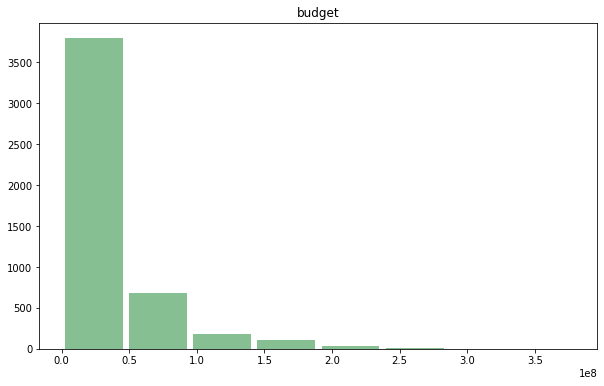

In [46]:
#Looking at the budget of the various films
#We can see that more than 3500 movies have a budget < 50*10^6
movies.hist(column="budget",bins =8, grid = False,figsize=(10,6), color='#86bf91', zorder=2, rwidth=0.9)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001CD6B33AF88>]],
      dtype=object)

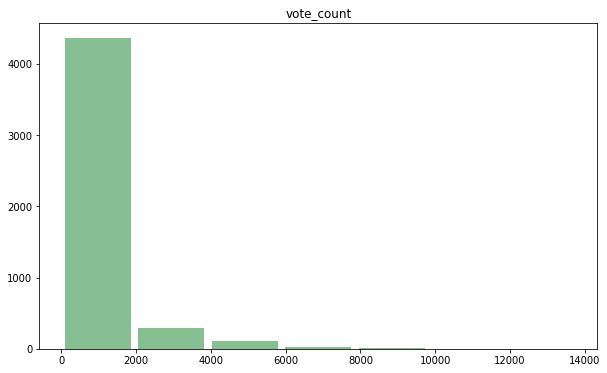

In [47]:
movies.hist(column="vote_count",bins =7, grid = False,figsize=(10,6), color='#86bf91', zorder=2, rwidth=0.9)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001CD35BF65C8>]],
      dtype=object)

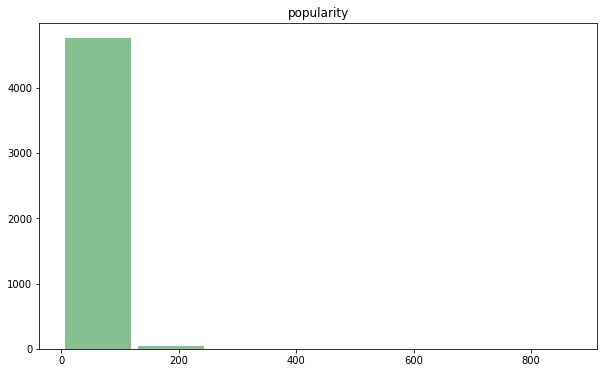

In [48]:
movies.hist(column="popularity",bins =7, grid = False,figsize=(10,6), color='#86bf91', zorder=2, rwidth=0.9)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001CD35C2DB88>]],
      dtype=object)

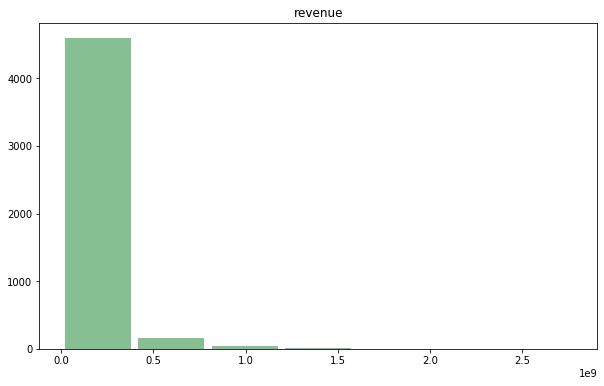

In [49]:
movies.hist(column="revenue",bins =7, grid = False,figsize=(10,6), color='#86bf91', zorder=2, rwidth=0.9)

In [50]:
movies.median(axis=0)

budget          1.500000e+07
id              1.462900e+04
popularity      1.292159e+01
revenue         1.917000e+07
runtime         1.030000e+02
vote_average    6.200000e+00
vote_count      2.350000e+02
dtype: float64

In [51]:
movies.mean(axis=0)

budget          2.904504e+07
id              5.716548e+04
popularity      2.149230e+01
revenue         8.226064e+07
runtime         1.068759e+02
vote_average    6.092172e+00
vote_count      6.902180e+02
dtype: float64

In [52]:
#We can see from the graph and data that popularity, revenue and vote_count is right skewed

In [53]:
movies[['id','genres']]

,id,genres
0,19995,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam..."
1,285,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""..."
2,206647,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam..."
3,49026,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam..."
4,49529,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam..."
...,...,...
4798,9367,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam..."
4799,72766,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 10749, ""..."
4800,231617,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam..."
4801,126186,[]


In [54]:
#taking just the genres column
genre = movies['genres']
#Creating and empty dataset
columns = ['id_g','name']
data = pd.DataFrame(columns=columns)
#Filling the emtpy dataset with 0's
data = data.fillna(0)
#Getting the first row
data=json.loads(movies['genres'][0])
Genre_data=pd.DataFrame.from_dict(data,orient='columns')
i=0
#Appending all the rows after getting a basic structure
for i in range(len(genre)):
    genre = movies['genres'][i]
    data+=json.loads(genre)
    Genre_data=pd.DataFrame.from_dict(data,orient='columns')

C:\Users\ikapo\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='barh')` instead of `Series.plot('barh',)`.
  


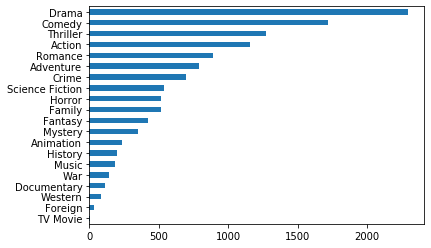

In [55]:
#Top 5 genres are Drama, Comedy, Thriller, Actionn and Adventure
Genre_data['name'].value_counts().plot('barh').invert_yaxis()

### Get a score based recomender system

In [56]:
movies

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4798,220000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",NaN,9367,"[{""id"": 5616, ""name"": ""united states\u2013mexi...",es,El Mariachi,El Mariachi just wants to play his guitar and ...,14.269792,"[{""name"": ""Columbia Pictures"", ""id"": 5}]","[{""iso_3166_1"": ""MX"", ""name"": ""Mexico""}, {""iso...",1992-09-04,2040920,81.0,"[{""iso_639_1"": ""es"", ""name"": ""Espa\u00f1ol""}]",Released,"He didn't come looking for trouble, but troubl...",El Mariachi,6.6,238
4799,9000,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 10749, ""...",NaN,72766,[],en,Newlyweds,A newlywed couple's honeymoon is upended by th...,0.642552,[],[],2011-12-26,0,85.0,[],Released,A newlywed couple's honeymoon is upended by th...,Newlyweds,5.9,5
4800,0,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...",http://www.hallmarkchannel.com/signedsealeddel...,231617,"[{""id"": 248, ""name"": ""date""}, {""id"": 699, ""nam...",en,"Signed, Sealed, Delivered","""Signed, Sealed, Delivered"" introduces a dedic...",1.444476,"[{""name"": ""Front Street Pictures"", ""

In [57]:
#IMDB's weighted average is given by:
#WA = v/v+m(R) + m/m+v(C)
#v is the number of votes for the movie;
#m is the minimum votes required to be listed in the chart;
#R is the average rating of the movie; And
#C is the mean vote across the whole reportx

In [58]:
C = movies['vote_average'].mean()

In [59]:
#We can see that the mean and median are almost the same therefore the data is not skewed 
movies['vote_average'].median()

6.2

In [60]:
#Mean and median has a huge differnce, Data is skewed
print(movies['vote_count'].mean())
print(movies['vote_count'].median())

690.2179887570269
235.0


In [61]:
#Vote count cutoff - I will take 80 percentile as a cutoff
print(max(movies['vote_count']))
print(movies['vote_count'].mean())
print(movies['vote_count'].median())
print(movies['vote_count'].quantile(0.85))
m= movies['vote_count'].quantile(0.80)

13752
690.2179887570269
235.0
1300.6999999999998


In [62]:
new_movies = movies.copy().loc[movies['vote_count']>=m]

In [63]:
new_movies.shape

(961, 20)

In [64]:
def recommender_sys1(new_movies,m=m,C=C):
    v=new_movies['vote_count']
    R=new_movies['vote_average']
    return (v/(v+m)*R) + (m/(m+v)*C)

In [65]:
new_movies['score'] = new_movies.apply(recommender_sys1, axis=1)

In [66]:
new_movies

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,score
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,7.116845
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,6.758257
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,6.263305
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,7.456523
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,6.097567
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4577,15000,"[{""id"": 27, ""name"": ""Horror""}, {""id"": 9648, ""n...",http://www.paranormalactivity-movie.com/,23827,"[{""id"": 10224, ""name"": ""haunting""}, {""id"": 147...",en,Paranormal Activity,"After a young, middle class couple moves into ...",47.456823,"[{""name"": ""Blumhouse Productions"", ""id"": 3172}...",...,2007-09-14,193355800,86.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,What Happens When You Sleep?,Paranormal Activity,5.9,1316,5.980939
4579,400000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 35, ""...",http://www.sonypictures.com/cthe/montypython/,762,"[{""id"": 113, ""name"": ""holy grail""}, {""id"": 345...",en,Monty Python and the Holy Grail,"King Arthur, accompanied by his squire, recrui...",64.782984,"[{""name"": ""Python (Monty) Pictures Limited"", ""...",...,1975-03-13,5028948,91.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,And now! At Last! Another film completely diff...,Monty Python and the Holy Grail,7.8,1708,7.186473
4602,350000,"[{""id"": 18, ""name"": ""Drama""}]",NaN,389,"[{""id"": 934, ""name"": ""judge""}, {""id"": 1417, ""n...",en,12 Angry Men,The defense and the prosecution have rested an...,59.259204,"[{""name"": ""United Artists"", ""id"": 60}, {""name""...",...,1957-03-25,1000000,96.0,"[{""is

In [67]:
#Sort movies based on the calculated score
new_movies = new_movies.sort_values('score',ascending = False)

In [68]:
new_movies_recom_1 = new_movies[['title','score']]

In [69]:
new_movies_recom_1

,title,score
1881,The Shawshank Redemption,8.248353
662,Fight Club,8.096134
3337,The Godfather,8.077404
3232,Pulp Fiction,8.074738
65,The Dark Knight,8.044250
...,...,...
193,After Earth,5.299709
91,Independence Day: Resurgence,5.231040
3746,The Boy Next Door,5.063681
210,Batman & Robin,4.962731


In [70]:
movies

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4798,220000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",NaN,9367,"[{""id"": 5616, ""name"": ""united states\u2013mexi...",es,El Mariachi,El Mariachi just wants to play his guitar and ...,14.269792,"[{""name"": ""Columbia Pictures"", ""id"": 5}]","[{""iso_3166_1"": ""MX"", ""name"": ""Mexico""}, {""iso...",1992-09-04,2040920,81.0,"[{""iso_639_1"": ""es"", ""name"": ""Espa\u00f1ol""}]",Released,"He didn't come looking for trouble, but troubl...",El Mariachi,6.6,238
4799,9000,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 10749, ""...",NaN,72766,[],en,Newlyweds,A newlywed couple's honeymoon is upended by th...,0.642552,[],[],2011-12-26,0,85.0,[],Released,A newlywed couple's honeymoon is upended by th...,Newlyweds,5.9,5
4800,0,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...",http://www.hallmarkchannel.com/signedsealeddel...,231617,"[{""id"": 248, ""name"": ""date""}, {""id"": 699, ""nam...",en,"Signed, Sealed, Delivered","""Signed, Sealed, Delivered"" introduces a dedic...",1.444476,"[{""name"": ""Front Street Pictures"", ""

### Popularity based recommender system

<BarContainer object of 5 artists>

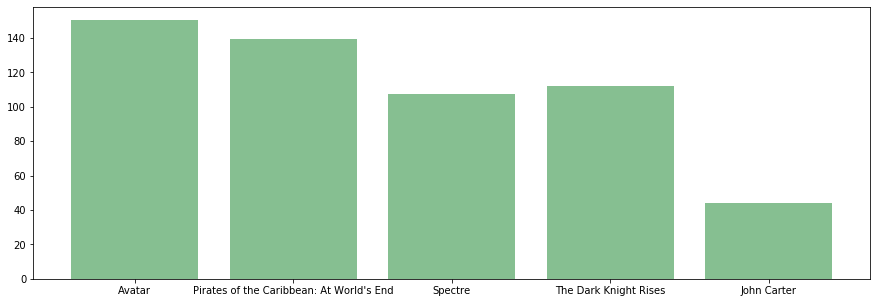

In [71]:
movies.sort_values('popularity',ascending = False)
plt.figure(figsize=(15,5))
plt.bar(movies['title'].head(5), movies['popularity'].head(5), color='#86bf91')

### "Plot Description" based Recommender

In [35]:
#Calculating similarity score based on different similarity scores
#1. Euclidean similarity score
#3. Pearson correlation similarity score
#4. Cosine Similarity score

In [36]:
#removing stop words like the, a(count , widespace, wordembedding, wordtovec)
tfidf = TfidfVectorizer(stop_words='english')
#Replace NA values with empty string
movies['overview'] = movies['overview'].fillna('')
#Construct the required TF-IDF matrix 
tfidf_matrix = tfidf.fit_transform(movies['overview'])

In [72]:
type(movies['overview'])

pandas.core.series.Series

### Cosine Similarity using Linear Kernel


In [38]:
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

In [39]:
cosine_sim

array([[1.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 1.        , 0.        , ..., 0.02160533, 0.        ,
        0.        ],
       [0.        , 0.        , 1.        , ..., 0.01488159, 0.        ,
        0.        ],
       ...,
       [0.        , 0.02160533, 0.01488159, ..., 1.        , 0.01609091,
        0.00701914],
       [0.        , 0.        , 0.        , ..., 0.01609091, 1.        ,
        0.01171696],
       [0.        , 0.        , 0.        , ..., 0.00701914, 0.01171696,
        1.        ]])

In [40]:
#Construct a reverse map of indices and movie titles
indices = pd.Series(movies.index, index=movies['title']).drop_duplicates()

In [41]:
indices

title
Avatar                                         0
Pirates of the Caribbean: At World's End       1
Spectre                                        2
The Dark Knight Rises                          3
John Carter                                    4
                                            ... 
El Mariachi                                 4798
Newlyweds                                   4799
Signed, Sealed, Delivered                   4800
Shanghai Calling                            4801
My Date with Drew                           4802
Length: 4803, dtype: int64

In [42]:
def recommendation_list(title, cosine_sim=cosine_sim):
    idx = indices[title]
    scores = list(enumerate(cosine_sim[idx]))
    scores = sorted(scores, key=lambda x: x[1], reverse=True)
    scores = scores[1:11]
    for i in scores:
        mi = i[0] 
        print(movies['title'].iloc[mi])

In [51]:
recommendation_list('Khiladi 786')

Chiamatemi Francesco - Il Papa della gente
To Be Frank, Sinatra at 100
The Helix... Loaded
Food Chains
From Russia with Love
Evil Dead
A Nightmare on Elm Street 5: The Dream Child
Die Hard: With a Vengeance
Scary Movie 3
The Transporter Refueled


#### Using RBF Kernel

In [44]:
rbf_kernel = rbf_kernel(tfidf_matrix, tfidf_matrix) 

In [45]:
def recommendation_list(title, rbf_kernel=rbf_kernel):
    idx = indices[title]
    scores = list(enumerate(rbf_kernel[idx]))
    scores = sorted(scores, key=lambda x: x[1], reverse=True)
    scores = scores[1:11]
    for i in scores:
        mi = i[0] 
        print(movies['title'].iloc[mi])

In [46]:
recommendation_list('The Dark Knight Rises')

Chiamatemi Francesco - Il Papa della gente
To Be Frank, Sinatra at 100
The Helix... Loaded
Food Chains
The Dark Knight
Batman Forever
Batman Returns
Batman
Batman: The Dark Knight Returns, Part 2
Batman Begins


In [48]:
laplacian_kernel = laplacian_kernel(tfidf_matrix, tfidf_matrix) 

In [49]:
def recommendation_list(title, laplacian_kernel=laplacian_kernel):
    idx = indices[title]
    scores = list(enumerate(laplacian_kernel[idx]))
    scores = sorted(scores, key=lambda x: x[1], reverse=True)
    scores = scores[1:11]
    for i in scores:
        mi = i[0] 
        print(movies['title'].iloc[mi])

In [50]:
recommendation_list('The Dark Knight Rises')

Chiamatemi Francesco - Il Papa della gente
To Be Frank, Sinatra at 100
The Helix... Loaded
Food Chains
Harrison Montgomery
The Ten
Amidst the Devil's Wings
Khiladi 786
Batman
Chairman of the Board


##### Best results from linear kernel.

# ----------------------------THE END---------------------------